In [1]:
# from gensim.models import LdaModel
from gensim.models import LdaSeqModel
import pickle as pkl
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from matplotlib import pyplot as plt
import pingouin as pg

In [2]:
# Optimal number of topics
nTopics = 45

/Users/mashrekur/opt/anaconda3/envs/nn_project/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
# Define colors to associate with each topic
# custom_colors = {
#  'burlywood': '#DEB887',
#  'chocolate': '#D2691E',
#  'crimson': '#DC143C',
#  'darkgreen': '#006400',
#  'darkorange': '#FF8C00',
#  'darkslategrey': '#2F4F4F',
#  'deepskyblue': '#00BFFF',
#  'dimgray': '#696969',
#  'firebrick': '#B22222',
#  'gold': '#FFD700',
#  'goldenrod':'#DAA520',
#  'lawngreen':'#7CFC00',
#  'rosybrown':'#BC8F8F',
#  'mediumslateblue':'#7B68EE',
#  'mediumvioletred': '#C71585',
#  'orangered': '#FF4500',
#  'orchid': '#DA70D6',
#  'royalblue': '#4169E1',
#  'slateblue': '#6A5ACD',
#  'springgreen': '#00FF7F',
#  'steelblue': '#4682B4',
#  'teal': '#008080',
#  'turquoise': '#40E0D0',
#  'chamoisee': '#A0785A',
#  'blueviolet': '#8A2BE2',
#  'yellowgreen': '#9ACD32',
#  'red': '#ff0000',
#  'royalblue': '#4169E1',
#  'green':  '#008000',
#  'violet': '#ee82ee',
#  'coral':'#FF7F50',
#  'magenta':'#FF00FF',
#  'maroon':'#800000',
#  'navy':'#000080',
#  'olive':'#0095B6',
#  'blue':'#0000FF',
#  'brown':'#873260',
#  'khaki':'#F0E68C',
#  'orange':'#007AA5',
# #  'linen':'#FAF0E6',
#  'purple':'#BD33A4',
#  'palevioletred':'#DB7093',
#  'sienna':'#A0522D',
#  'mediumspringgreen':'#00FA9A',
#  'indianred':'#CD5C5C',
#  'tomato': '#FF6347',
#  'darkcyan': '#008B8B',
# }

# # Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod':'#DAA520',
 'lawngreen':'#7CFC00',
 'rosybrown':'#BC8F8F',
 'mediumslateblue':'#7B68EE',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'chamoisee': '#A0785A',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32',
 'cadmiumred': '#E30022',
 'royalblue': '#4169E1',
 'americanrose':  '#FF033E',
 'asparagus': '#87A96B',
 'coral':'#FF7F50',
 'magenta':'#FF00FF',
 'cadet':'#536872',
 'navy':'#000080',
 'bondiblue':'#0095B6',
 'blue':'#0000FF',
 'boysenberry':'#873260',
 'khaki':'#F0E68C',
 'cgblue':'#007AA5',
#  'linen':'#FAF0E6',
 'byzantine':'#BD33A4',
 'palevioletred':'#DB7093',
 'sienna':'#A0522D',
 'mediumspringgreen':'#00FA9A',
 'indianred':'#CD5C5C',
 'tomato': '#FF6347',
 'darkcyan': '#008B8B',
    
}

# turn into a list
colorlist = []
for i, color in enumerate(custom_colors.values()):
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))
    colorlist[i] = (colorlist[i][0] / 256, colorlist[i][1] / 256, colorlist[i][2] / 256)

In [4]:
# # Define topic names
# topic_names = [
# 'Water Quality',
# 'Sediment Transport',
# 'Wastewater Treatment',
# 'Flood Risk & Assessment',
# 'Hydrogeology',
# 'Coastal Hydrology', 
# 'River Flow',
# 'Wetland & Ecology',
# 'Runoff Quality',
# 'Rainfall-Runoff',
# 'Urban Drainage',
# 'Systems Hydrology',
# 'Surface-GW Interactions',
# 'Irrigation Water Management',
# 'Drought & Water Scarcity',
# 'Climate Change Impacts',
# 'Gauging & Monitoring',
# 'Forecasting',
# 'Glaciology',
# 'Salinity',
# 'Peatlands Mapping & Monitoring',
# 'Spatial Variability',
# 'Land Surface Flux',
# 'Solute Transport',
# 'Water Resources Management',
# 'Numerical Modeling',
# 'Hydrochemistry',
# 'Pollutant Removal',
# 'Groundwater Recharge',
# 'Uncertainty',
# 'Land Cover',
# 'Modeling & Calibration',
# 'Soil Moisture',
# 'Water Storage & Budgeting',
# 'Aquifers & Abstraction',
# 'Microbiology',
# 'Streamflow',
# 'Erosion',
# 'Dynamic Processes',
# 'Temporal Variability',
# 'Spatial Variability of Precipitation',
# 'Rainfall Intensity & Measurement',
# 'Watershed Hydrology',
# 'Hydraulics',
# 'Quantitative Analysis',
# ]

In [5]:
#45 dtm topics
topic_names = [
'Streamflow',
'Groundwater',
'Wastewater Treatment',
'Ecosystem Studies',
'Hydrobiology',
'Hydrogeology',
'Mass-balance and Transfer',
'Sediment Transport',
'Rainfall-Runoff',
'Stochastic Models',
'Hydrochemistry',
'Microbiology',
'Nutrient and Heavy Metal Removal',
'Systems Hydrology',
'Quantitative Methods',
'Water Treatment',
'Irrigation',  
'Uncertainty',
'Biodegradation',
'Solute Transport',
'Land-Surface Flux',
'Modeling',
'Pollutant Sampling & Monitoring',
'Evaporation & Transpiration',
'Gauging & Monitoring',
'Reservoir Management',
'Pollutant Removal',
'Topography',
'Water Management Solutions',
'Vadose Zone',
'Ecological Modeling',
'Soil Chemistry',
'Water Policy and Planning',
'Surface Water Quality',
'Precipitation',
'Soil and Hydrometeorological Sampling',
'Infiltration',
'Spatial Variability',
'Numerical Modeling',
'Rainfall',
'Sedimentology',
'Groundwater Supply & Demand',
'Aquifers',
'Watershed Features',
'Climate Change Impacts',
]

# Load Data

In [6]:
# Load model
dtm_model = LdaSeqModel.load('trained_models/dtm_model45')

In [7]:
#load doc-topic distributions
with open('data/dtm_doc_topic_all.pkl', 'rb') as f:
    arr_arr = pkl.load(f)

In [8]:
# Load raw corpus dataframe
with open('data/raw_corpus_broad_dtm.pkl', 'rb') as f:
    corpus_df = pkl.load(f)

In [9]:
# Pull topics
topics = dtm_model.print_topics(top_terms=20)
topics

[[('flow', 0.14590894375166233),
  ('discharge', 0.05545372190532527),
  ('stream', 0.053449923776802605),
  ('network', 0.047861178652654414),
  ('channel', 0.04694774274029255),
  ('river', 0.035425793275972915),
  ('drainage', 0.03229600085724704),
  ('basin', 0.014696040458538262),
  ('low', 0.013413750176182695),
  ('reach', 0.011544019801079684),
  ('downstream', 0.010703418907382944),
  ('route', 0.009364384619396962),
  ('slope', 0.008676093776521789),
  ('drain', 0.008519484591163895),
  ('length', 0.008239658485272463),
  ('width', 0.00822197238129336),
  ('path', 0.007881254641285985),
  ('stage', 0.007738251180104735),
  ('outflow', 0.007706304092217646),
  ('bank', 0.007371517020116261)],
 [('water', 0.07658573860505084),
  ('groundwater', 0.046694439209385395),
  ('recharge', 0.025717932329164615),
  ('aquifer', 0.016941020337892937),
  ('area', 0.015533746219469994),
  ('table', 0.01550164408599715),
  ('flow', 0.013452421473313497),
  ('system', 0.012058881718034261),
 

# Create WordClouds and Trend Plots

In [10]:
# calculate time series
years = np.unique(corpus_df['Year'])
topic_distributions_by_year = np.zeros([len(years), 45])
# for y, year in enumerate(years):
#     hm_year = topic_distributions[corpus_df['Year'] == year,:]
#     topic_distributions_by_year[y,:] = np.sum(hm_year, axis=0) / np.sum(hm_year)

In [11]:
#Create a dataframe of topic popularities per year

topic_popularity = {}

for y, year in enumerate(years):
    
    topic_popularity[y] = {}
    
    for t, topic in enumerate(topic_names):
        
        topic_popularity[y][t] = np.sum(arr_arr[y][:,t])/len(arr_arr[y])
        
topic_popularity_df = pd.DataFrame(topic_popularity).transpose()

In [12]:
topic_popularity_df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.021419,0.039789,0.034200,0.002133,0.017907,0.016920,0.005345,0.012252,0.021555,0.025385,...,0.003320,0.038064,0.023814,0.077403,0.015473,0.007332,0.023106,0.035608,0.014895,0.019814
1,0.021749,0.051551,0.029669,0.002164,0.015684,0.014771,0.004528,0.015336,0.021635,0.023431,...,0.004129,0.038095,0.022534,0.067486,0.014490,0.010435,0.022048,0.036494,0.012211,0.013313
2,0.019616,0.046790,0.037527,0.002130,0.017852,0.016732,0.004528,0.015794,0.022307,0.026270,...,0.003067,0.032271,0.026848,0.065485,0.012274,0.009887,0.027858,0.032391,0.011333,0.019267
3,0.021004,0.037472,0.052128,0.002400,0.019052,0.020487,0.005509,0.013760,0.018593,0.021816,...,0.003899,0.034808,0.022548,0.068571,0.014627,0.008796,0.017633,0.034256,0.015862,0.013892
4,0.018336,0.043977,0.040547,0.002349,0.017575,0.019272,0.005391,0.016514,0.017758,0.026930,...,0.002873,0.036167,0.029915,0.070944,0.010118,0.008781,0.019471,0.037841,0.014556,0.015372
5,0.020206,0.040039,0.039230,0.002466,0.017862,0.015198,0.004929,0.014288,0.019487,0.024646,...,0.002752,0.031292,0.029012,0.059514,0.013964,0.007389,0.022208,0.027632,0.015847,0.015442
6,0.021126,0.038668,0.042621,0.002190,0.016477,0.014799,0.004761,0.014571,0.022499,0.018810,...,0.003704,0.036402,0.026348,0.048541,0.017067,0.008097,0.024489,0.029073,0.018098,0.023983
7,0.019600,0.035202,0.036214,0.002350,0.017139,0.018626,0.005269,0.013661,0.017650,0.022225,...,0.003400,0.029940,0.027773,0.053694,0.015141,0.007502,0.023853,0.030609,0.019014,0.020524
8,0.020664,0.044566,0.039028,0.002000,0.016616,0.014572,0.004547,0.017754,0.020798,0.017013,...,0.003005,0.030793,0.022612,0.048630,0.016517,0.008275,0.022589,0.031277,0.017065,0.026819
9,0.021381,0.042549,0.042149,0.002437,0.018006,0.013997,0.005209,0.017046,0.018058,0.016868,...,0.003419,0.031561,0.025838,0.050414,0.018467,0.007338,0.024962,0.025671,0.018894,0.022882


In [13]:
#Calculate regression stats for topic popularities

# col_names = ['n','r','CI95%','p-val', 'BF10', 'power']
# trend_df = pd.DataFrame(columns = col_names) 

y_arr = np.array(range(0,30,1))

for t, topic in enumerate(topic_names):
    trend_df = pg.corr(y_arr, topic_popularity_df[t])
    print(topic,',', trend_df['r'][0],',',trend_df['p-val'][0],',',trend_df['BF10'][0])
    

Streamflow , -0.00038563149512488293 , 0.9983863308835571 , 0.227
Groundwater , -0.3926093597085255 , 0.03186892220517807 , 2.045
Wastewater Treatment , -0.7753522296528462 , 4.862324811452655e-07 , 3.848e+04
Ecosystem Studies , 0.5046136025735998 , 0.004459234798645413 , 10.743
Hydrobiology , -0.4870336341316044 , 0.006342847589804902 , 7.933
Hydrogeology , -0.8804827667628798 , 1.410766359011333e-10 , 6.857e+07
Mass-balance and Transfer , -0.8775691481823655 , 1.939959353336094e-10 , 5.111e+07
Sediment Transport , -0.13492623195639986 , 0.477158501928725 , 0.289
Rainfall-Runoff , 0.6438075088821243 , 0.00012377967628522261 , 253.823
Stochastic Models , -0.9399427794727199 , 1.3441598639790636e-14 , 3.58e+11
Hydrochemistry , -0.896040635472767 , 2.2111852068127262e-11 , 3.794e+08
Microbiology , -0.7951590481691841 , 1.5248818147964546e-07 , 1.112e+05
Nutrient and Heavy Metal Removal , -0.25409983538981146 , 0.17542180452415743 , 0.545
Systems Hydrology , 0.5009352209892373 , 0.0048077

In [14]:
trend_df['r'][0]

0.9409930229592656

In [15]:
# fig = plt.figure(figsize=(150,50), facecolor='white')
# # plt.title('Mean Shannon Diversity Per Journal Per Year', fontsize = 400)

# # plot numbering starts at 1, not 0
# plot_number = 1

# for t, topic in enumerate(topic_names):

#     ax = fig.add_subplot(45, 1, plot_number) #, sharex = ax

#     x = pg.corr(y_arr, topic_distributions_by_year[:,t], ax = ax)
#     ax.set_title(topic, size = 10)
#     print(topic)
#     print(x)
#     # Go to the next plot for the next loop
#     plot_number = plot_number + 1


In [16]:
# create wordclouds
stop_words = stopwords.words('english')
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=3500,
                  max_words=15,
                  color_func=lambda *args, **kwargs: list(custom_colors.values())[t],
                  prefer_horizontal=1.0)

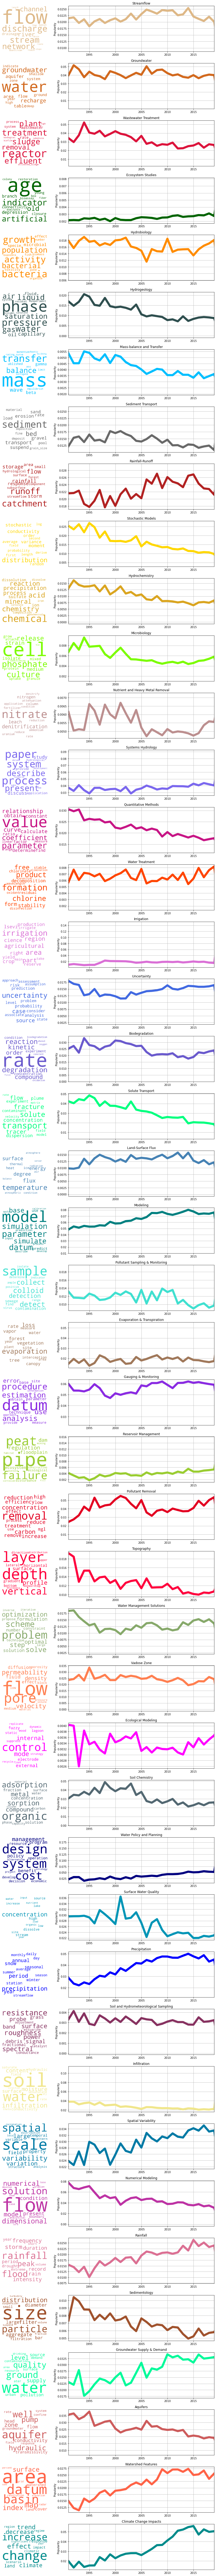

In [17]:
# Plot wordclouds and scaled time series
fig = plt.figure(figsize=(12, 3*nTopics))
gs = fig.add_gridspec(nTopics,3)
for t in range(nTopics):
    
    # plot time series
    ax1 = fig.add_subplot(gs[t, 1:])
    ax1.plot(years, topic_popularity_df[t], color=list(custom_colors.values())[t], linewidth=8)
    ax1.set_title(topic_names[t])
    ax1.set_xticks(years[4::5])
    ax1.set_xlim(0,28)
    ax1.set_ylabel('Popularity')
    ax1.grid()
    
    # plot wordclouds
    ax0 = fig.add_subplot(gs[t, 0])
    topic_words = dict(topics[t])
    cloud.generate_from_frequencies(topic_words, max_font_size=1500)
#     cloud.recolor(color_func=grouped_color_func)
    ax0.imshow(cloud)
    ax0.axis('off')
    
fig.tight_layout()

# Save figure
plt.savefig('figures/wordclouds_and_trends_broad.png')

In [18]:
# # Plot relative time series
# fig = plt.figure(figsize=(26,10))
# gs = fig.add_gridspec(1,4)

# ax1 = fig.add_subplot(gs[0, :3])
# for i in range(lda_model.num_topics):
#     r, g, b = colorlist[i] 
#     pltcolor = (r / 255., g / 255., b / 255.)
#     ax1.plot(years, topic_distributions_by_year[:,i], 
#              c=pltcolor, linewidth=3, label=topic_names[i])
# ax1.set_xticks(years[::5])
# ax1.set_xlim([0, 28])
# ax1.set_ylim([0, 0.10])
# ax1.set_ylabel('Popularity', fontsize=20)
# ax1.set_title('Relative Popularity of Topics', fontsize=28)
# ax1.grid()

# ax0 = fig.add_subplot(gs[0, 3])
# for i in range(lda_model.num_topics):
#     r, g, b = colorlist[i] 
#     pltcolor = (r / 255., g / 255., b / 255.)
#     ax0.plot(years, topic_distributions_by_year[:,i], 
#              c=pltcolor, linewidth=3, label=topic_names[i])
# ax0.set_xticks([])
# ax0.set_yticks([])
# ax0.legend(loc='best', shadow=True, fancybox = True)
# for i in range(lda_model.num_topics):
#     r, g, b = colorlist[i] 
#     pltcolor = (r / 255., g / 255., b / 255.)
#     ax0.plot(years, topic_distributions_by_year[:,i], 
#              c='w', linewidth=6, label=topic_names[i])

# # Save figure
# plt.savefig('figures/relative_topic_trends_broad.png')

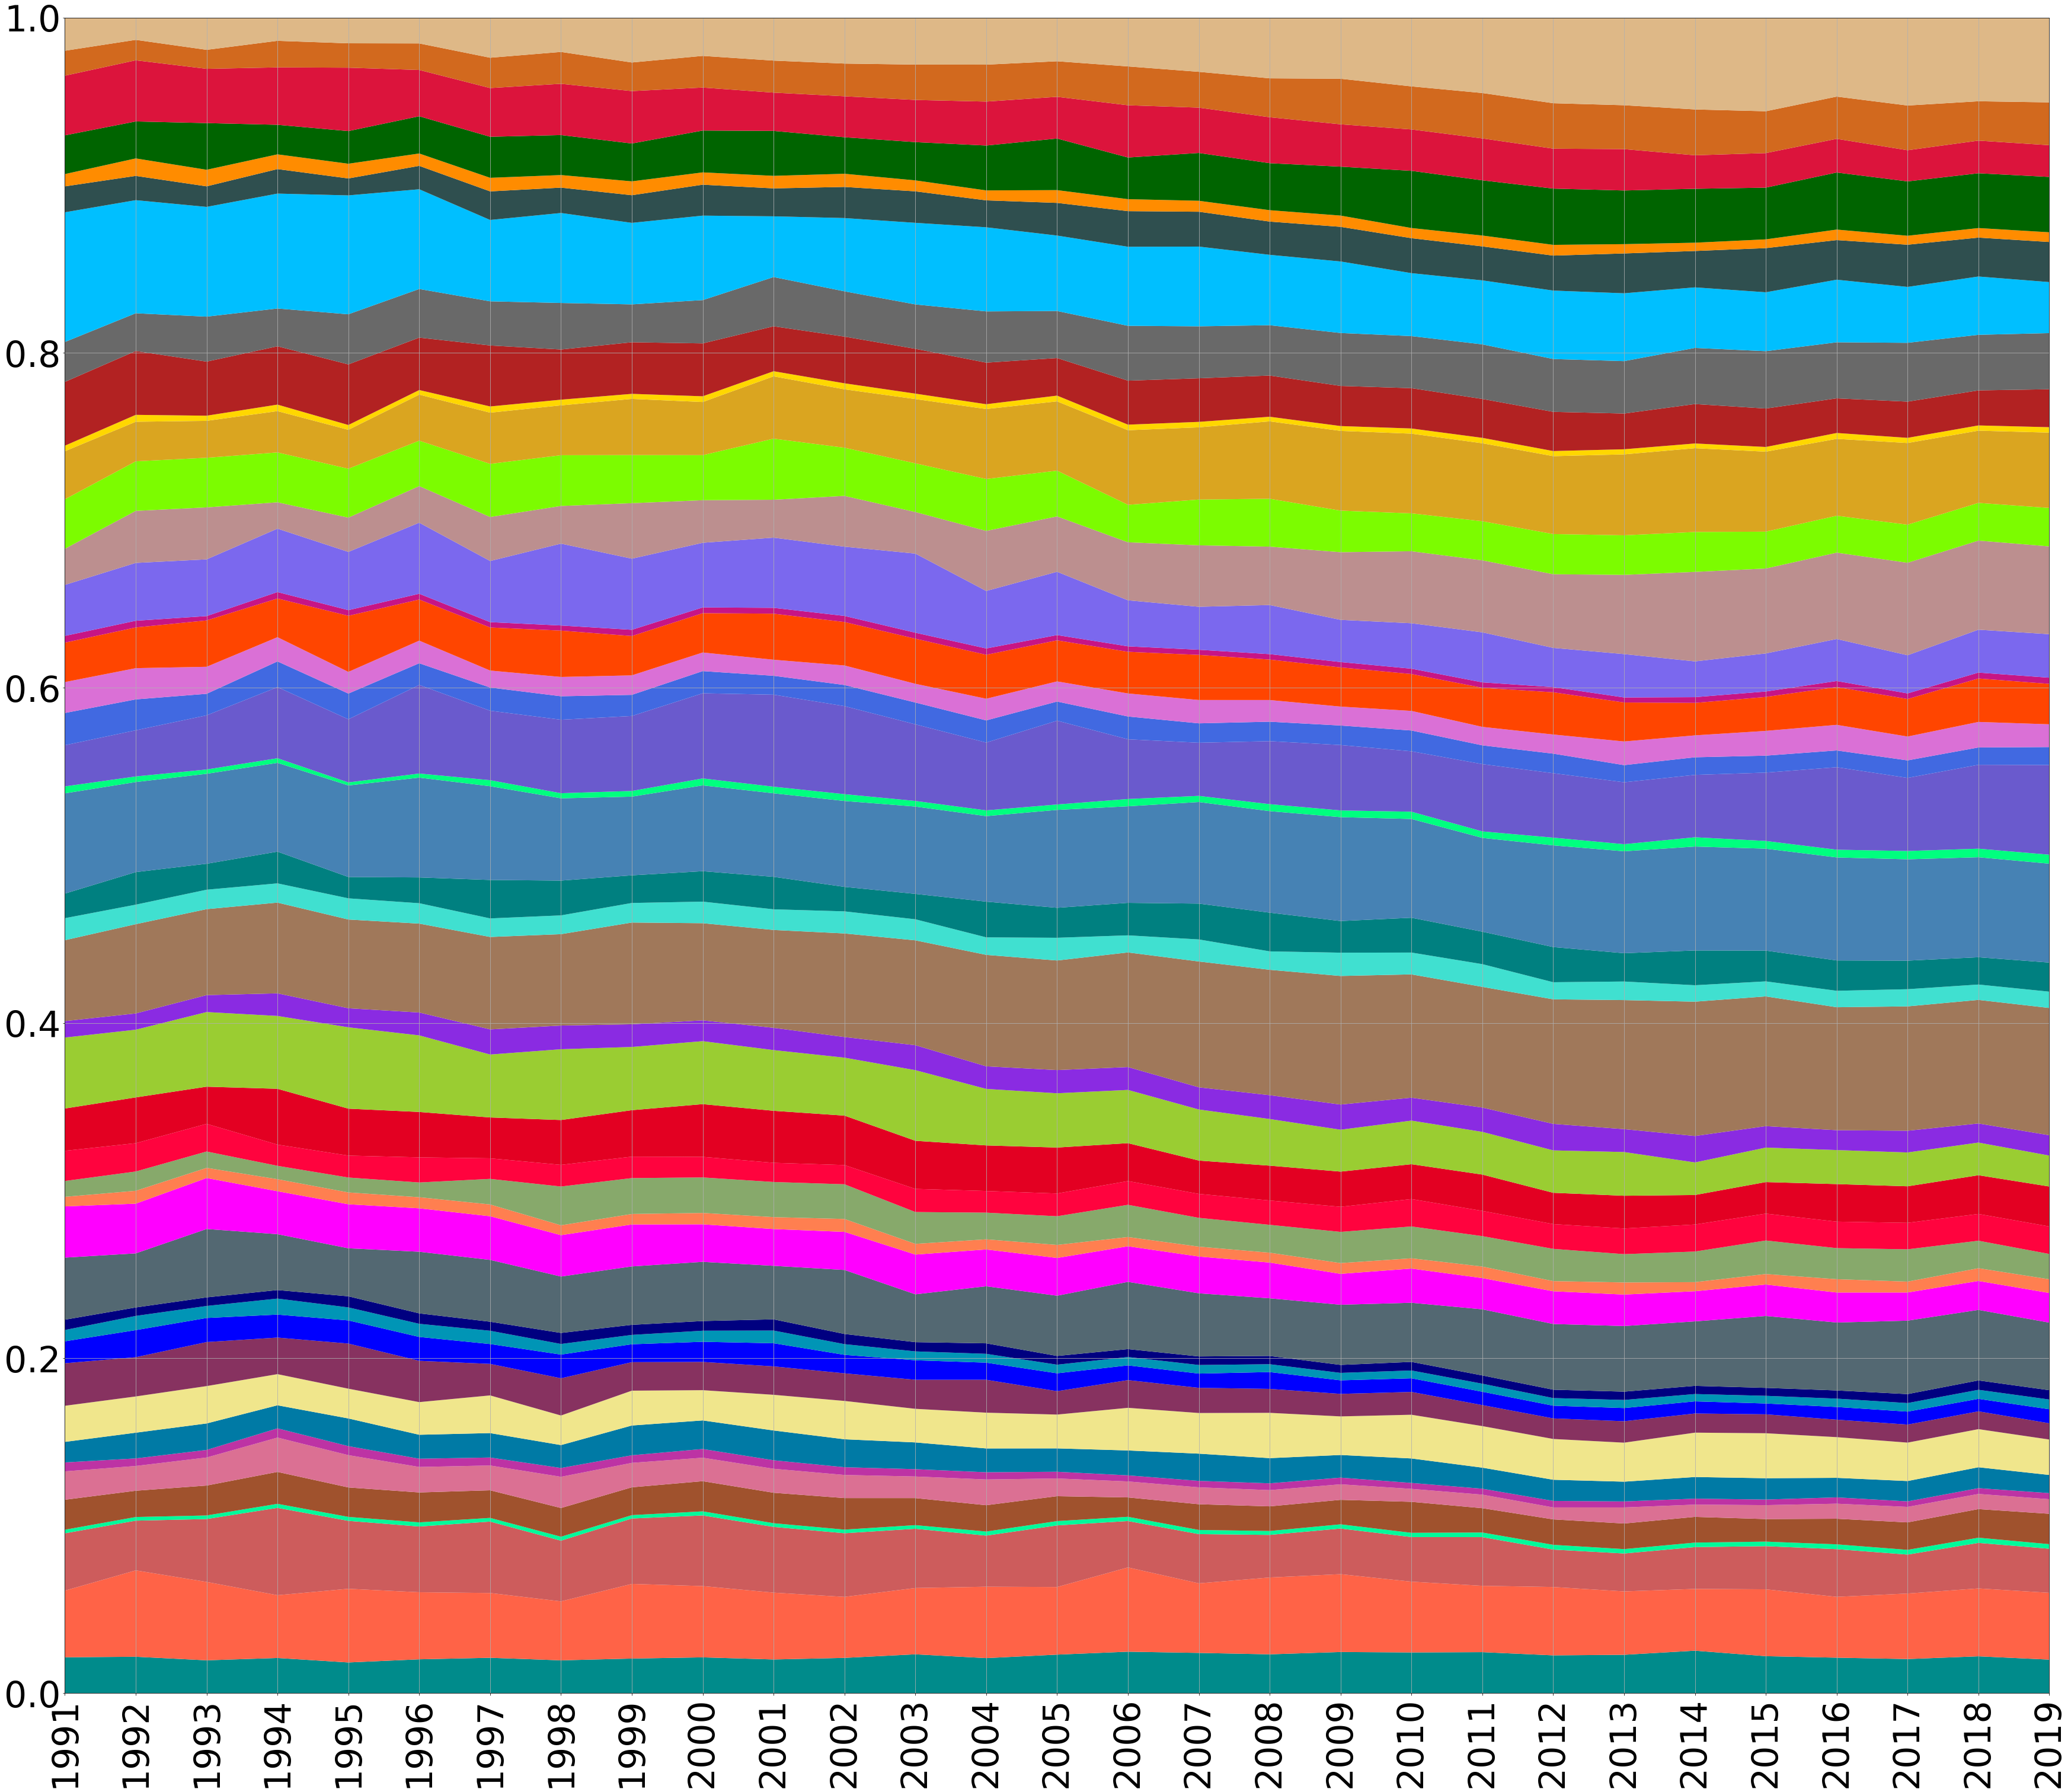

In [37]:
# calculate relative popularity of each topic per year and store them in a dictionary

# arr_arr[time][document][topic_dist]

relative_topic_popularity = {}

for y, year in enumerate(years):
    
    relative_topic_popularity[year] = {}
    
    for t, topic in enumerate(topic_names):
        
        relative_topic_popularity[year][topic] = np.sum(arr_arr[y][:,t])/np.sum(arr_arr[y][:,:])

#Convert dictionary to dataframe for ease of viewing and plotting

relative_popularity_df = pd.DataFrame(relative_topic_popularity)

# with open("../data/relative_popularity_df.pkl", 'wb') as f:
#      pkl.dump(relative_popularity_df, f)
        
#plot relative popularity

plt.figure(figsize=(60,52))
plt.stackplot(years, relative_popularity_df, colors = list(custom_colors.values())[::-1])
plt.xlim(0,28)
plt.ylim(0, 1.0)
plt.xticks(size = 60, rotation=90)
plt.yticks(size = 60)
# plt.legend(relative_popularity_df.transpose(), frameon=True, bbox_to_anchor=(1.13, 0.5, 0.05, 0.05), prop={'size': 40}, loc = 'center', shadow = True, fancybox = True)
plt.grid()

# Save figure
plt.savefig('figures/relative_topic_trends_broad.png')
# plt.savefig('figures/relative_topic_trends_broad.png')

In [ ]:
# # Plot relative time series
# fig = plt.figure(figsize=(26, 12))
# gs = fig.add_gridspec(1,4)

# ax1 = fig.add_subplot(gs[0, :3])
# ax1.stackplot(years, topic_distributions_by_year.transpose(),labels=topic_names, colors=list(custom_colors.values()))
# # ax1.legend(topic_names, loc='center right', shadow=True)
# ax1.set_xticks(years[::5])
# ax1.set_xlim([years[0], 28])
# ax1.set_ylim(0, 1)
# ax1.set_ylabel('Popularity', fontsize=16)
# ax1.set_title('Relative Popularity of Topics', fontsize=22)
# ax1.grid()

# ax0 = fig.add_subplot(gs[0, 3])
# ax0.stackplot(years, topic_distributions_by_year.transpose(),labels=topic_names, colors=list(custom_colors.values()))
# ax0.legend(topic_names, loc='center right', shadow=True, fancybox = True)
# ax0.axis('off')

# # Save figure
# plt.savefig('figures/stackarea_relative_topics_broad.png')

In [92]:
#calculate change in popularity

relative_popularity_df = relative_popularity_df.transpose()

def pop_calc(s):
    perc_change = ((relative_popularity_df['2019'][s] - relative_popularity_df['1991'][s])/ relative_popularity_df['1991'][s]) * 100
    return perc_change

In [93]:
# relative_popularity_df

In [95]:
#Percentage change in popularity

for t,topic in enumerate(topic_names):
    print(topic,',', pop_calc(topic))

Streamflow , -6.523895531266059
Groundwater , 0.2503503489299381
Wastewater Treatment , -23.101120679016468
Ecosystem Studies , 27.64041535660557
Hydrobiology , 1.3244643005916297
Hydrogeology , -48.62804657379951
Mass-balance and Transfer , -31.89264333305198
Sediment Transport , -11.688221690309621
Rainfall-Runoff , -1.887951493715858
Stochastic Models , -61.8002991364814
Hydrochemistry , -36.15654578106754
Microbiology , -13.61511665549478
Nutrient and Heavy Metal Removal , -9.600325693689431
Systems Hydrology , 8.844508876247827
Quantitative Methods , -42.12589471738718
Water Treatment , 43.1081365365793
Irrigation , 59.725450870953324
Uncertainty , -8.782208577061503
Biodegradation , -5.5834492788118295
Solute Transport , -56.41060996437649
Land-Surface Flux , 23.67819648393662
Modeling , 57.35082230142914
Pollutant Sampling & Monitoring , -26.081166902713054
Evaporation & Transpiration , 18.295888071933366
Gauging & Monitoring , -1.3126902684278121
Reservoir Management , 28.88530